In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('delhivery_data.csv')
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


## Basic Data Cleaning and Exploration

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
start_scan_to_end_scan,144867.0,961.262986,1037.012769,20.000000,161.000000,449.000000,1634.000000,7898.000000
cutoff_factor,144867.0,232.926567,344.755577,9.000000,22.000000,66.000000,286.000000,1927.000000
actual_distance_to_destination,144867.0,234.073372,344.990009,9.000045,23.355874,66.126571,286.708875,1927.447705
actual_time,144867.0,416.927527,598.103621,9.000000,51.000000,132.000000,513.000000,4532.000000
osrm_time,144867.0,213.868272,308.011085,6.000000,27.000000,64.000000,257.000000,1686.000000
osrm_distance,144867.0,284.771297,421.119294,9.008200,29.914700,78.525800,343.193250,2326.199100
factor,144867.0,2.120107,1.715421,0.144000,1.604264,1.857143,2.213483,77.387097
segment_actual_time,144867.0,36.196111,53.571158,-244.000000,20.000000,29.000000,40.000000,3051.000000
segment_osrm_time,144867.0,18.507548,14.775960,0.000000,11.000000,17.000000,22.000000,1611.000000
segment_osrm_distance,144867.0,22.829020,17.860660,0.000000,12.070100,23.513000,27.813250,2191.403700


In [4]:
df.describe(include='object').T

,count,unique,top,freq
data,144867,2,training,104858
trip_creation_time,144867,14817,2018-09-28 05:23:15.359220,101
route_schedule_uuid,144867,1504,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,1812
route_type,144867,2,FTL,99660
trip_uuid,144867,14817,trip-153811219535896559,101
source_center,144867,1508,IND000000ACB,23347
source_name,144574,1498,Gurgaon_Bilaspur_HB (Haryana),23347
destination_center,144867,1481,IND000000ACB,15192
destination_name,144606,1468,Gurgaon_Bilaspur_HB (Haryana),15192
od_start_time,144867,26369,2018-09-21 18:37:09.322207,81


In [5]:
df.dtypes

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment_factor                    

In [6]:
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])
# df['cutoff_timestamp'] = pd.to_datetime(df['cutoff_timestamp'])
df.dtypes


data                                      object
trip_creation_time                datetime64[ns]
route_schedule_uuid                       object
route_type                                object
trip_uuid                                 object
source_center                             object
source_name                               object
destination_center                        object
destination_name                          object
od_start_time                     datetime64[ns]
od_end_time                       datetime64[ns]
start_scan_to_end_scan                   float64
is_cutoff                                   bool
cutoff_factor                              int64
cutoff_timestamp                          object
actual_distance_to_destination           float64
actual_time                              float64
osrm_time                                float64
osrm_distance                            float64
factor                                   float64
segment_actual_time 

In [7]:
df['cutoff_timestamp'] = df['cutoff_timestamp'].str.split('.').str[0]
df['cutoff_timestamp'] = pd.to_datetime(df['cutoff_timestamp'])
df.dtypes

data                                      object
trip_creation_time                datetime64[ns]
route_schedule_uuid                       object
route_type                                object
trip_uuid                                 object
source_center                             object
source_name                               object
destination_center                        object
destination_name                          object
od_start_time                     datetime64[ns]
od_end_time                       datetime64[ns]
start_scan_to_end_scan                   float64
is_cutoff                                   bool
cutoff_factor                              int64
cutoff_timestamp                  datetime64[ns]
actual_distance_to_destination           float64
actual_time                              float64
osrm_time                                float64
osrm_distance                            float64
factor                                   float64
segment_actual_time 

In [8]:
df[df['trip_uuid']=="trip-153741093647649320"]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:47:29,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:25:58,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:15:56,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 04:49:20,43.595802,102.0,45.0,53.2334,2.266667,26.0,6.0,6.0434,4.333333


In [9]:
df.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [10]:
# Since the source_center and destination_center IDs are available which is important for analysis we can just rename the null values 
df.loc[df['source_name'].isna(), 'source_name'] = 'Not Available'
df.loc[df['destination_name'].isna(), 'destination_name'] = 'Not Available'
df.isna().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

In [11]:
# Dropping Unkown Columns from the data frame 

df.drop(columns = {'is_cutoff','cutoff_factor','cutoff_timestamp','segment_factor','factor'},inplace=True)
df.dtypes

data                                      object
trip_creation_time                datetime64[ns]
route_schedule_uuid                       object
route_type                                object
trip_uuid                                 object
source_center                             object
source_name                               object
destination_center                        object
destination_name                          object
od_start_time                     datetime64[ns]
od_end_time                       datetime64[ns]
start_scan_to_end_scan                   float64
actual_distance_to_destination           float64
actual_time                              float64
osrm_time                                float64
osrm_distance                            float64
segment_actual_time                      float64
segment_osrm_time                        float64
segment_osrm_distance                    float64
dtype: object

In [12]:
print(f"Dataset Start Date: {df.trip_creation_time.min()}")
print(f"Dataset End Date: {df.trip_creation_time.max()}")

Dataset Start Date: 2018-09-12 00:00:16.535741
Dataset End Date: 2018-10-03 23:59:42.701692


In [13]:
df_data = df.groupby(by = 'data')['trip_uuid'].count().to_frame().reset_index()
df_data['perc'] = np.round(df_data['trip_uuid'] * 100/ df_data['trip_uuid'].sum(), 2)
df_data.head()

,data,trip_uuid,perc
0,test,40009,27.62
1,training,104858,72.38


In [14]:
df_route = df.groupby(by = 'route_type')['trip_uuid'].count().to_frame().reset_index()
df_route['perc'] = np.round(df_route['trip_uuid'] * 100/ df_route['trip_uuid'].sum(), 2)
df_route.head()

,route_type,trip_uuid,perc
0,Carting,45207,31.21
1,FTL,99660,68.79


## Grouping by Segment

In [15]:
df['segment'] = df.apply(lambda x : "".join([x['trip_uuid'],x['source_center'],x['destination_center']]),axis=1)

In [16]:
df['segment_actual_time'] = df.groupby('segment')['segment_actual_time'].cumsum()
df['segment_osrm_time']  = df.groupby('segment')['segment_osrm_time'].cumsum()
df['segment_osrm_distance'] = df.groupby('segment')['segment_osrm_distance'].cumsum()

In [17]:
segment_key_dict = {'data' : 'first',
                    'trip_uuid': 'first',
                    'source_center':'first',
                    'destination_center': 'last',
                    'route_type' : 'first',
                    'trip_creation_time' : 'first',
                    'source_name' : 'first',
                    'destination_name' : 'last',
                    'od_start_time' : 'first',
                    'od_end_time' : 'last',
                    'start_scan_to_end_scan' : 'first',
                    'actual_distance_to_destination' : 'last',
                    'actual_time' : 'last',
                    'osrm_time' : 'last',
                    'osrm_distance' : 'last',
                    'segment_actual_time' : 'max',
                    'segment_osrm_time' : 'max',
                    'segment_osrm_distance' : 'max'}

df = df.groupby(by = 'segment', as_index = False).agg(segment_key_dict)
df

,segment,data,trip_uuid,source_center,destination_center,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748IND209304AAAIND000000ACB,training,trip-153671041653548748,IND209304AAA,IND000000ACB,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205
1,trip-153671041653548748IND462022AAAIND209304AAA,training,trip-153671041653548748,IND462022AAA,IND209304AAA,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528
2,trip-153671042288605164IND561203AABIND562101AAA,training,trip-153671042288605164,IND561203AAB,IND562101AAA,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
3,trip-153671042288605164IND572101AAAIND561203AAB,training,trip-153671042288605164,IND572101AAA,IND561203AAB,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
4,trip-153671043369099517IND000000ACBIND160002AAC,training,trip-153671043369099517,IND000000ACB,IND160002AAC,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,trip-153861115439069069IND628204AAAIND627657AAA,test,trip-153861115439069069,IND628204AAA,IND627657AAA,Carting,2018-10-03 23:59:14.390954,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.0,42.1431
26364,trip-153861115439069069IND628613AAAIND627005AAA,test,trip-153861115439069069,IND628613AAA,IND627005AAA,Carting,2018-10-03 23:59:14.390954,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,77.0,78.5869
26365,trip-153861115439069069IND628801AAAIND628204AAA,test,trip-153861115439069069,IND628801AAA,IND628204AAA,Carting,2018-10-03 23:59:14.390954,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,14.0,16.0184
26366,trip-153861118270144424IND583119AAAIND583101AAA,test,trip-153861118270144424,IND583119AAA,IND583101AAA,FTL,2018-10-03 23:59:42.701692,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,42.0,52.5303


In [18]:
df.sort_values(['segment', 'od_end_time'],inplace=True)

## Feature Engineering 

In [19]:
df['od_time_diff_hour'] = df['od_end_time'] - df['od_start_time']

In [20]:
df.head()

,segment,data,trip_uuid,source_center,destination_center,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_time_diff_hour
0,trip-153671041653548748IND209304AAAIND000000ACB,training,trip-153671041653548748,IND209304AAA,IND000000ACB,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205,0 days 21:00:36.265275
1,trip-153671041653548748IND462022AAAIND209304AAA,training,trip-153671041653548748,IND462022AAA,IND209304AAA,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528,0 days 16:39:30.322728
2,trip-153671042288605164IND561203AABIND562101AAA,training,trip-153671042288605164,IND561203AAB,IND562101AAA,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995,0 days 00:58:49.943264
3,trip-153671042288605164IND572101AAAIND561203AAB,training,trip-153671042288605164,IND572101AAA,IND561203AAB,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899,0 days 02:02:46.769161
4,trip-153671043369099517IND000000ACBIND160002AAC,training,trip-153671043369099517,IND000000ACB,IND160002AAC,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408,0 days 13:54:38.335721


In [21]:
## Source Name Feature Extraction

def splitter(x):
    val = x.split("_")
    if(len(val)==3):     # This is to handle this scenario --> Bhopal_Trnsport_H (Madhya Pradesh)
        v = val[-1].split("(")
        return val[0], val[1], v[0].strip(), v[-1].replace(")","")
    elif(len(val)==4):   # This is to handle this scenario --> Kanpur_Central_H_6 (Uttar Pradesh)
        v = val[-1].split("(")
        return (val[0],val[1],val[2]+(v[0].strip()),v[-1].replace(")",""))      
    


df['source_name'] = df['source_name'].apply(splitter)

In [22]:
df['source_name']

0         (Kanpur, Central, H6, Uttar Pradesh)
1        (Bhopal, Trnsport, H, Madhya Pradesh)
2         (Doddablpur, ChikaDPP, D, Karnataka)
3             (Tumkur, Veersagr, I, Karnataka)
4             (Gurgaon, Bilaspur, HB, Haryana)
                         ...                  
26363    (Tirchchndr, Shnmgprm, D, Tamil Nadu)
26364     (Peikulam, SriVnktpm, D, Tamil Nadu)
26365          (Eral, Busstand, D, Tamil Nadu)
26366         (Sandur, WrdN1DPP, D, Karnataka)
26367                                     None
Name: source_name, Length: 26368, dtype: object

In [23]:
df[['Source_City','Source_Place','Source_Code','Source_State']] = df['source_name'].apply(pd.Series)
df.drop(columns=['source_name'],inplace=True)

In [24]:
## Destination Name Feature Extraction

df['destination_name'] = df['destination_name'].apply(splitter)
df[['Destination_City','Destination_Place','Destination_Code','Destination_State']] = df['destination_name'].apply(pd.Series)
df.drop(columns=['destination_name'],inplace=True)

In [25]:
df.head()

,segment,data,trip_uuid,source_center,destination_center,route_type,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,...,segment_osrm_distance,od_time_diff_hour,Source_City,Source_Place,Source_Code,Source_State,Destination_City,Destination_Place,Destination_Code,Destination_State
0,trip-153671041653548748IND209304AAAIND000000ACB,training,trip-153671041653548748,IND209304AAA,IND000000ACB,FTL,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,...,670.6205,0 days 21:00:36.265275,Kanpur,Central,H6,Uttar Pradesh,Gurgaon,Bilaspur,HB,Haryana
1,trip-153671041653548748IND462022AAAIND209304AAA,training,trip-153671041653548748,IND462022AAA,IND209304AAA,FTL,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,...,649.8528,0 days 16:39:30.322728,Bhopal,Trnsport,H,Madhya Pradesh,Kanpur,Central,H6,Uttar Pradesh
2,trip-153671042288605164IND561203AABIND562101AAA,training,trip-153671042288605164,IND561203AAB,IND562101AAA,Carting,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,...,28.1995,0 days 00:58:49.943264,Doddablpur,ChikaDPP,D,Karnataka,Chikblapur,ShntiSgr,D,Karnataka
3,trip-153671042288605164IND572101AAAIND561203AAB,training,trip-153671042288605164,IND572101AAA,IND561203AAB,Carting,2018-09-12 00:00:22.886430,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,...,55.9899,0 days 02:02:46.769161,Tumkur,Veersagr,I,Karnataka,Doddablpur,ChikaDPP,D,Karnataka
4,trip-153671043369099517IND000000ACBIND160002AAC,training,trip-153671043369099517,IND000000ACB,IND160002AAC,FTL,2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,...,317.7408,0 days 13:54:38.335721,Gurgaon,Bilaspur,HB,Haryana,Chandigarh,Mehmdpur,H,Punjab


In [26]:
## Trip Creation timestamp Feature Extraction 

df['trip_creation_month'] = df['trip_creation_time'].dt.month
df['trip_creation_day'] = df['trip_creation_time'].dt.day
df['trip_creation_year'] = df['trip_creation_time'].dt.year

In [27]:
df.dtypes

segment                                    object
data                                       object
trip_uuid                                  object
source_center                              object
destination_center                         object
route_type                                 object
trip_creation_time                 datetime64[ns]
od_start_time                      datetime64[ns]
od_end_time                        datetime64[ns]
start_scan_to_end_scan                    float64
actual_distance_to_destination            float64
actual_time                               float64
osrm_time                                 float64
osrm_distance                             float64
segment_actual_time                       float64
segment_osrm_time                         float64
segment_osrm_distance                     float64
od_time_diff_hour                 timedelta64[ns]
Source_City                                object
Source_Place                               object


## Indepth Analysis 

In [28]:
trip_level_dict = {'source_center': 'first',
                   'destination_center':'last',
                   'route_type':'first',
                   'trip_creation_time':'first',
                   'od_start_time':'first',
                   'od_end_time':'last',
                   'start_scan_to_end_scan':'sum',
                   'actual_distance_to_destination':'sum',
                   'actual_time': 'sum', 
                   'osrm_time': 'sum',
                   'osrm_distance':'sum',
                   'segment_actual_time':'sum',
                   'segment_osrm_time':'sum',
                   'segment_osrm_distance':'sum',
                   'od_time_diff_hour':'sum',
                   'Source_City':'first',
                   'Source_Place':'first',
                   'Source_Code':'first',
                   'Source_State':'first',
                   'Destination_City':'last',
                   'Destination_Place':'last',
                   'Destination_Code':'last',
                   'Destination_State':'last',
                   'trip_creation_month':'first', 
                   'trip_creation_day':'first',
                   'trip_creation_year':'first'}

df_trip = df.groupby(by = 'trip_uuid', as_index = False).agg(trip_level_dict)
                 

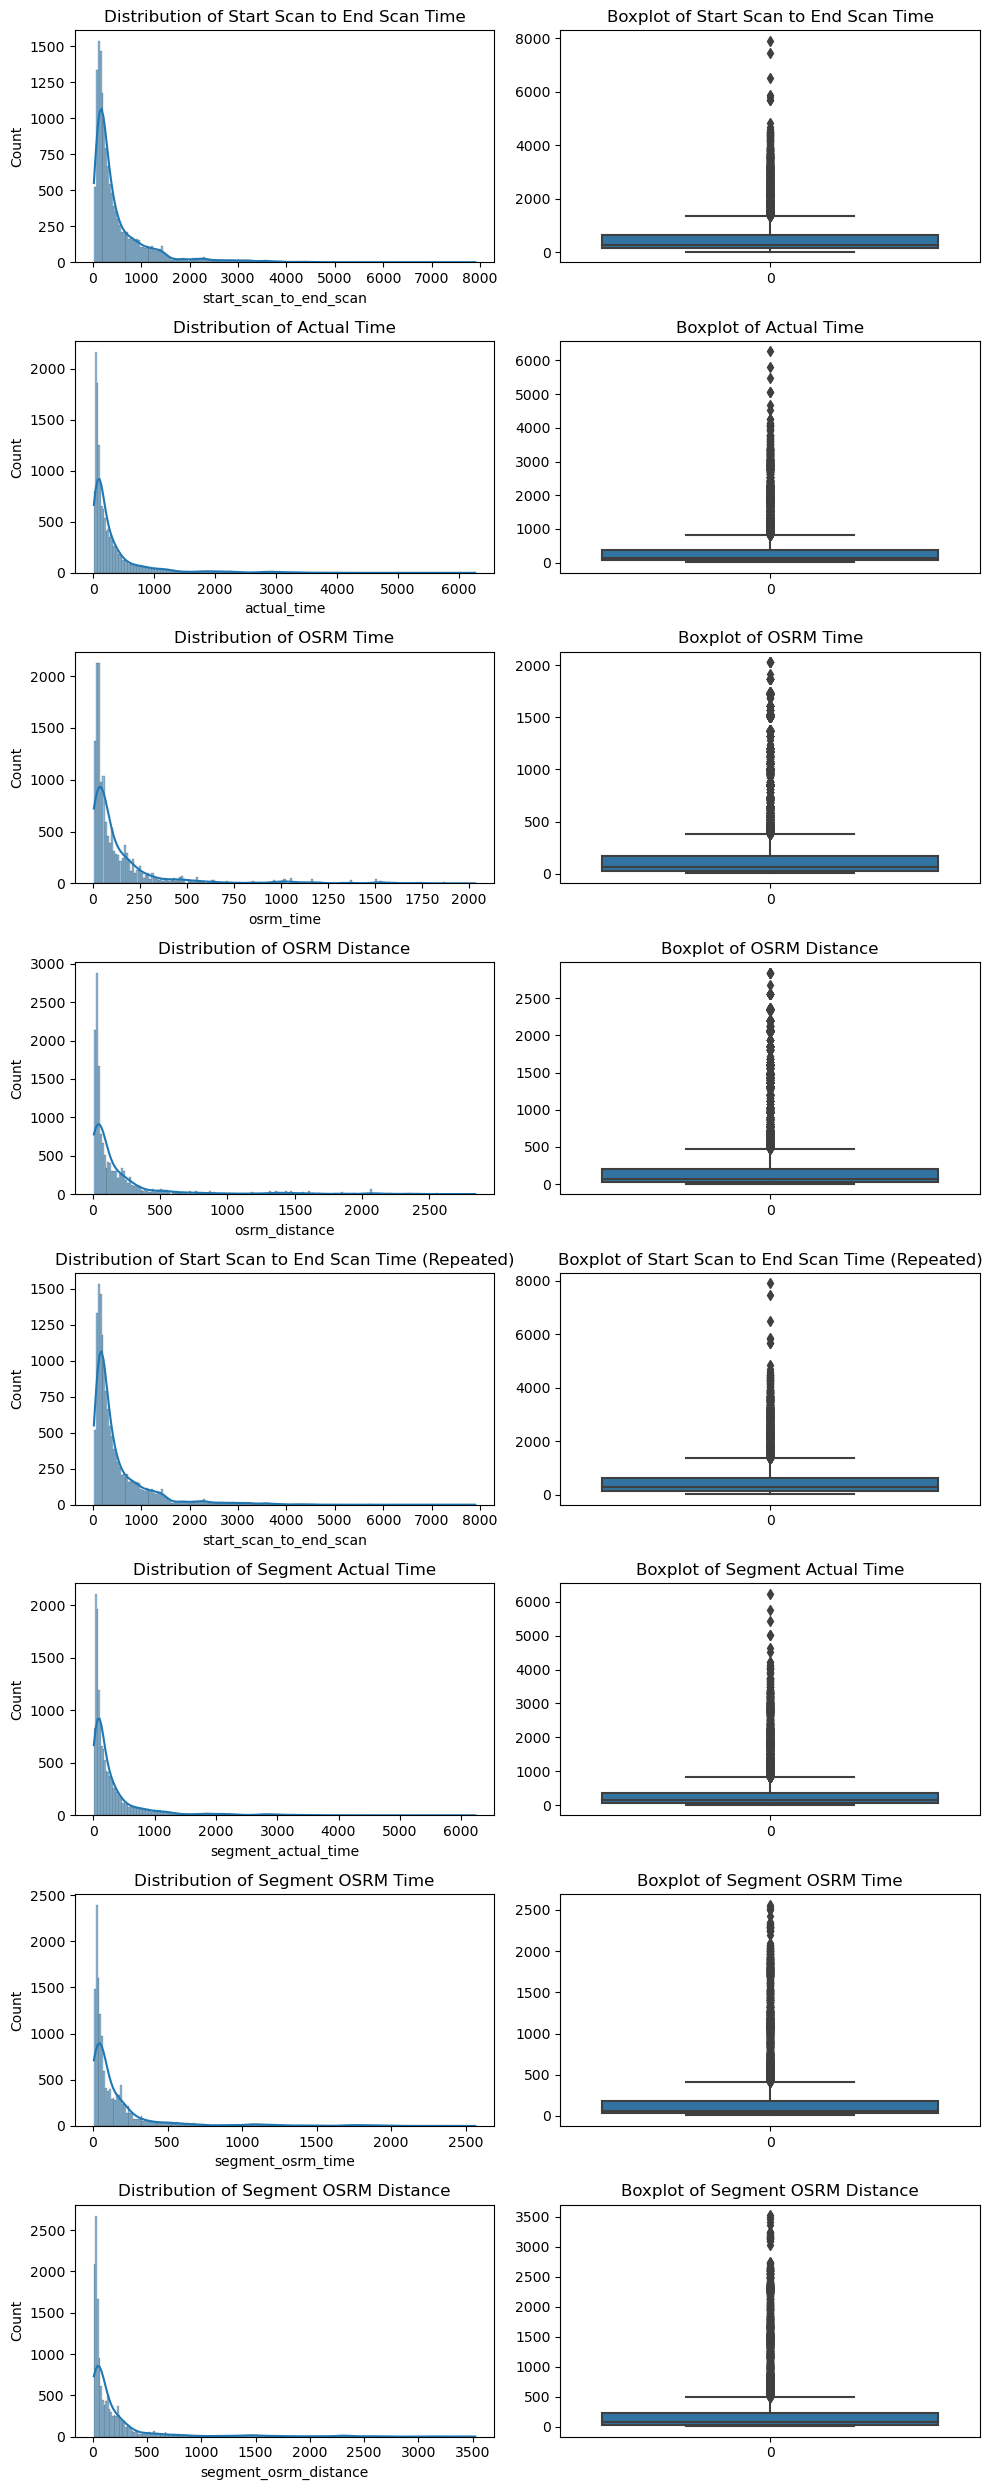

In [29]:
fig, axs = plt.subplots(8, 2, figsize=(10, 25))

sns.histplot(ax=axs[0,0], data=df_trip['start_scan_to_end_scan'], kde=True)
axs[0,0].set_title('Distribution of Start Scan to End Scan Time')
sns.boxplot(ax=axs[0,1], data=df_trip['start_scan_to_end_scan'])
axs[0,1].set_title('Boxplot of Start Scan to End Scan Time')

sns.histplot(ax=axs[1,0], data=df_trip['actual_time'], kde=True)
axs[1,0].set_title('Distribution of Actual Time')
sns.boxplot(ax=axs[1,1], data=df_trip['actual_time'])
axs[1,1].set_title('Boxplot of Actual Time')

sns.histplot(ax=axs[2,0], data=df_trip['osrm_time'], kde=True)
axs[2,0].set_title('Distribution of OSRM Time')
sns.boxplot(ax=axs[2,1], data=df_trip['osrm_time'])
axs[2,1].set_title('Boxplot of OSRM Time')

sns.histplot(ax=axs[3,0], data=df_trip['osrm_distance'], kde=True)
axs[3,0].set_title('Distribution of OSRM Distance')
sns.boxplot(ax=axs[3,1], data=df_trip['osrm_distance'])
axs[3,1].set_title('Boxplot of OSRM Distance')

sns.histplot(ax=axs[4,0], data=df_trip['start_scan_to_end_scan'], kde=True)
axs[4,0].set_title('Distribution of Start Scan to End Scan Time (Repeated)')
sns.boxplot(ax=axs[4,1], data=df_trip['start_scan_to_end_scan'])
axs[4,1].set_title('Boxplot of Start Scan to End Scan Time (Repeated)')

sns.histplot(ax=axs[5,0], data=df_trip['segment_actual_time'], kde=True)
axs[5,0].set_title('Distribution of Segment Actual Time')
sns.boxplot(ax=axs[5,1], data=df_trip['segment_actual_time'])
axs[5,1].set_title('Boxplot of Segment Actual Time')

sns.histplot(ax=axs[6,0], data=df_trip['segment_osrm_time'], kde=True)
axs[6,0].set_title('Distribution of Segment OSRM Time')
sns.boxplot(ax=axs[6,1], data=df_trip['segment_osrm_time'])
axs[6,1].set_title('Boxplot of Segment OSRM Time')

sns.histplot(ax=axs[7,0], data=df_trip['segment_osrm_distance'], kde=True)
axs[7,0].set_title('Distribution of Segment OSRM Distance')
sns.boxplot(ax=axs[7,1], data=df_trip['segment_osrm_distance'])
axs[7,1].set_title('Boxplot of Segment OSRM Distance')

# sns.histplot(ax=axs[8,0],data= df_trip['od_time_diff_hour'],kde=False,bins=10)
# sns.boxplot(ax=axs[8,1],data=df_trip['od_time_diff_hour'])
plt.tight_layout()
plt.show()

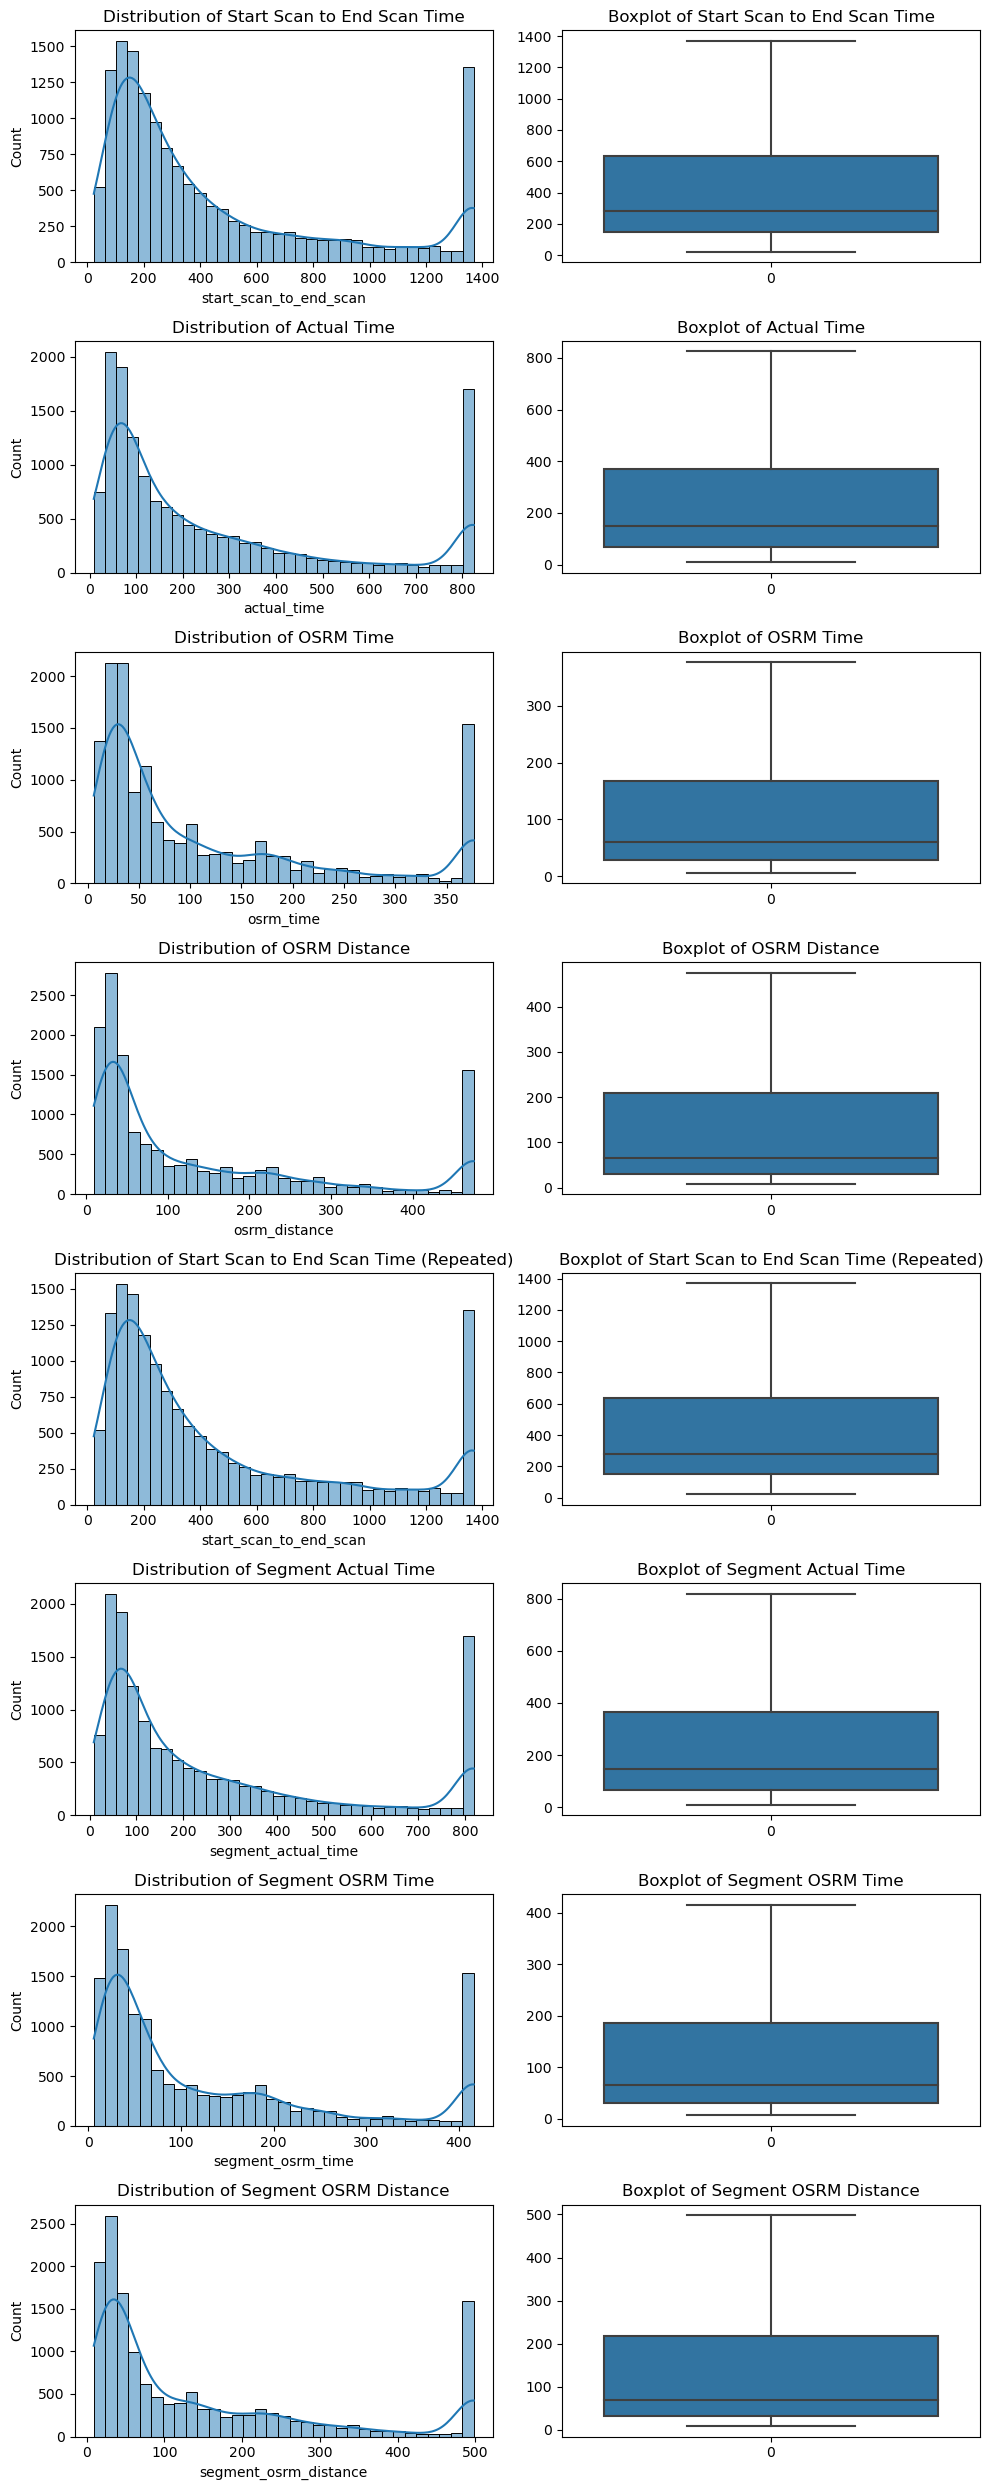

In [30]:
def clip_outliers_with_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

  
    df[column] = df[column].clip(lower_bound, upper_bound)


columns_to_clip = [
    'start_scan_to_end_scan', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
    'segment_osrm_distance','od_time_diff_hour'
]


for column in columns_to_clip:
    clip_outliers_with_iqr(df_trip, column)

    
    
fig, axs = plt.subplots(8, 2, figsize=(10, 25))

sns.histplot(ax=axs[0,0], data=df_trip['start_scan_to_end_scan'], kde=True)
axs[0,0].set_title('Distribution of Start Scan to End Scan Time')
sns.boxplot(ax=axs[0,1], data=df_trip['start_scan_to_end_scan'])
axs[0,1].set_title('Boxplot of Start Scan to End Scan Time')

sns.histplot(ax=axs[1,0], data=df_trip['actual_time'], kde=True)
axs[1,0].set_title('Distribution of Actual Time')
sns.boxplot(ax=axs[1,1], data=df_trip['actual_time'])
axs[1,1].set_title('Boxplot of Actual Time')

sns.histplot(ax=axs[2,0], data=df_trip['osrm_time'], kde=True)
axs[2,0].set_title('Distribution of OSRM Time')
sns.boxplot(ax=axs[2,1], data=df_trip['osrm_time'])
axs[2,1].set_title('Boxplot of OSRM Time')

sns.histplot(ax=axs[3,0], data=df_trip['osrm_distance'], kde=True)
axs[3,0].set_title('Distribution of OSRM Distance')
sns.boxplot(ax=axs[3,1], data=df_trip['osrm_distance'])
axs[3,1].set_title('Boxplot of OSRM Distance')

sns.histplot(ax=axs[4,0], data=df_trip['start_scan_to_end_scan'], kde=True)
axs[4,0].set_title('Distribution of Start Scan to End Scan Time (Repeated)')
sns.boxplot(ax=axs[4,1], data=df_trip['start_scan_to_end_scan'])
axs[4,1].set_title('Boxplot of Start Scan to End Scan Time (Repeated)')

sns.histplot(ax=axs[5,0], data=df_trip['segment_actual_time'], kde=True)
axs[5,0].set_title('Distribution of Segment Actual Time')
sns.boxplot(ax=axs[5,1], data=df_trip['segment_actual_time'])
axs[5,1].set_title('Boxplot of Segment Actual Time')

sns.histplot(ax=axs[6,0], data=df_trip['segment_osrm_time'], kde=True)
axs[6,0].set_title('Distribution of Segment OSRM Time')
sns.boxplot(ax=axs[6,1], data=df_trip['segment_osrm_time'])
axs[6,1].set_title('Boxplot of Segment OSRM Time')

sns.histplot(ax=axs[7,0], data=df_trip['segment_osrm_distance'], kde=True)
axs[7,0].set_title('Distribution of Segment OSRM Distance')
sns.boxplot(ax=axs[7,1], data=df_trip['segment_osrm_distance'])
axs[7,1].set_title('Boxplot of Segment OSRM Distance')

plt.tight_layout()
plt.show()


In [31]:
df_encoded = df_encoded = pd.get_dummies(df_trip, columns=['route_type'])
df_encoded.dtypes

trip_uuid                                  object
source_center                              object
destination_center                         object
trip_creation_time                 datetime64[ns]
od_start_time                      datetime64[ns]
od_end_time                        datetime64[ns]
start_scan_to_end_scan                    float64
actual_distance_to_destination            float64
actual_time                               float64
osrm_time                                 float64
osrm_distance                             float64
segment_actual_time                       float64
segment_osrm_time                         float64
segment_osrm_distance                     float64
od_time_diff_hour                 timedelta64[ns]
Source_City                                object
Source_Place                               object
Source_Code                                object
Source_State                               object
Destination_City                           object


In [32]:
df_encoded['route_type_Carting'] = df_encoded['route_type_Carting'].astype(int)
df_encoded['route_type_FTL'] = df_encoded['route_type_FTL'].astype(int)
df_encoded[['route_type_Carting','route_type_FTL']]

,route_type_Carting,route_type_FTL
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
14812,1,0
14813,1,0
14814,1,0
14815,1,0


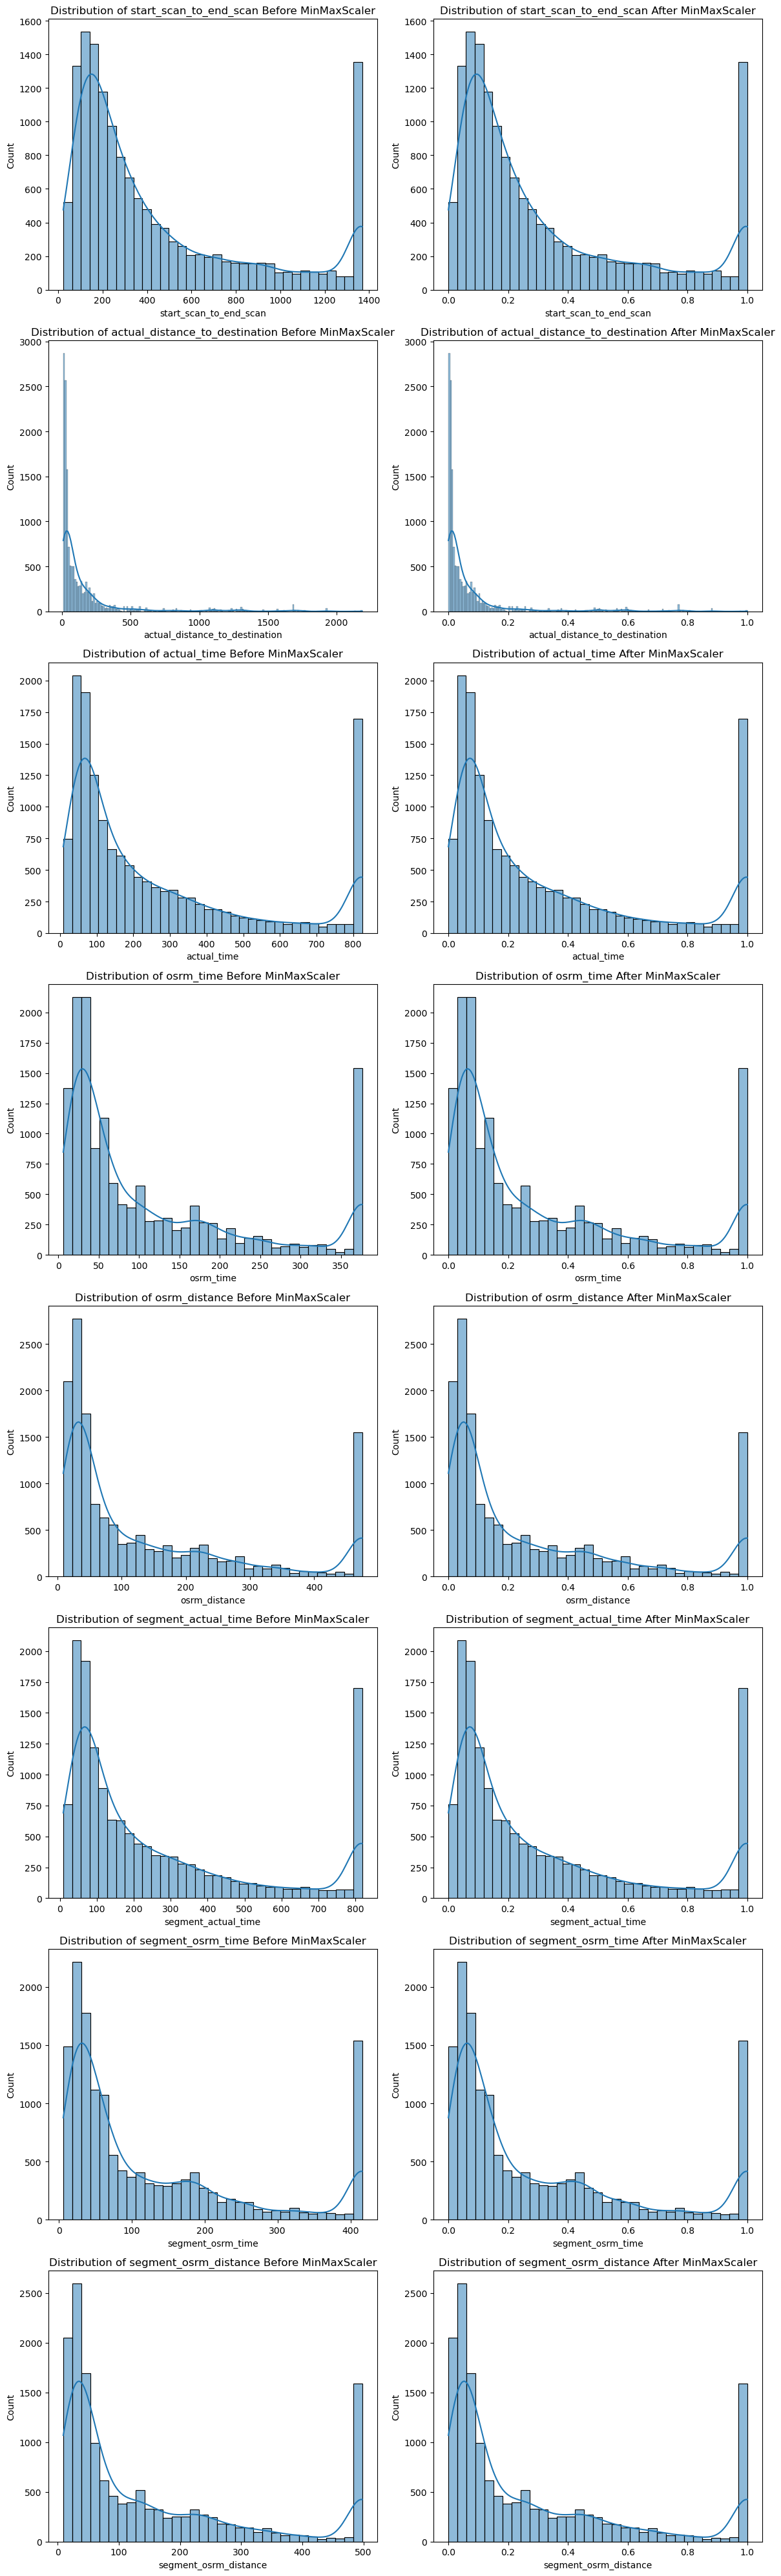

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['start_scan_to_end_scan', 'actual_distance_to_destination', 
                    'actual_time', 'osrm_time', 'osrm_distance', 
                    'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance']

fig, axs = plt.subplots(len(columns_to_scale), 2, figsize=(12, 40))

for i, column in enumerate(columns_to_scale):
    sns.histplot(data=df_trip[column], ax=axs[i, 0], kde=True)
    axs[i, 0].set_title(f'Distribution of {column} Before MinMaxScaler')

scaler = MinMaxScaler()
df_trip_scaled = df_trip.copy()
df_trip_scaled[columns_to_scale] = scaler.fit_transform(df_trip[columns_to_scale])

for i, column in enumerate(columns_to_scale):
    sns.histplot(data=df_trip_scaled[column], ax=axs[i, 1], kde=True)
    axs[i, 1].set_title(f'Distribution of {column} After MinMaxScaler')

plt.tight_layout()
plt.show()


## Hypothesis Testing 

#### Actual_time Aggergated vs Segment_time Aggregated

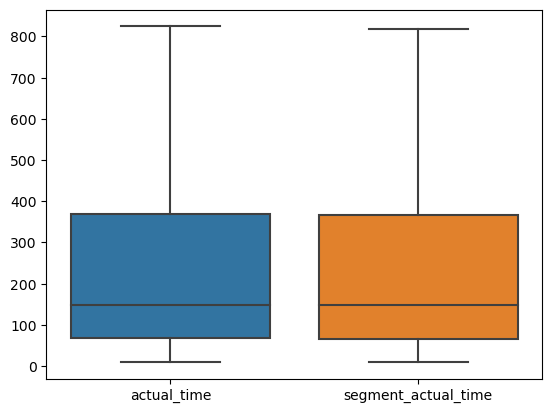

In [34]:
sns.boxplot(data=df_trip[['actual_time','segment_actual_time']])
plt.show()

> **Null Hypothesis:** There is no difference between actual_time and segment_actual_time

> **Alternative Hypothesis:** There is a difference between actual_time and segment_actual_time

   >>  - Alpha Value = 0.05
   >>  - Since it is a Independence test of two columns we can use ttest indpendent

In [35]:
from scipy.stats import ttest_ind

alpha = 0.05

t_stat, p_value = ttest_ind(df_trip_scaled.actual_time, df_trip_scaled.segment_actual_time, alternative='two-sided')

print('Test Statistic:', t_stat)
print('P value:', p_value)

if p_value>alpha:
  print("Result: \nFail to reject null hypothesis. \nThere is no difference between actual time and segment actual time")
else:
  print("Result: \nReject null hypothesis. \nThere is a difference between actual time and segment actual time")

Test Statistic: 0.13317421679613164
P value: 0.8940565055306489
Result: 
Fail to reject null hypothesis. 
There is no difference between actual time and segment actual time


#### Actual_time Aggergated vs OSRM_time Aggregated

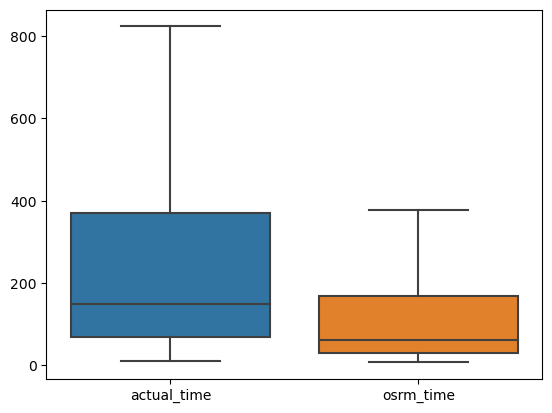

In [36]:
sns.boxplot(data=df_trip[['actual_time','osrm_time']])
plt.show()

> **Null Hypothesis:** There is no difference between actual_time and OSRM_time

> **Alternative Hypothesis:** There is a difference between actual_time and OSRM_time

   >>  - Alpha Value = 0.05
   >>  - Since it is a Independence test of two columns we can use ttest indpendent

In [37]:
alpha = 0.05

t_stat, p_value = ttest_ind(df_trip_scaled.actual_time, df_trip_scaled.osrm_time, alternative='two-sided')

print('Test Statistic:', t_stat)
print('P value:', p_value)

if p_value>alpha:
  print("Result: \nFail to reject null hypothesis. \nThere is no difference between actual time and OSRM actual time")
else:
  print("Result: \nReject null hypothesis. \nThere is a difference between actual time and OSRM actual time")

Test Statistic: 5.0635169420910895
P value: 4.1405590006444475e-07
Result: 
Reject null hypothesis. 
There is a difference between actual time and OSRM actual time


#### OSRM Distance vs Segment OSRM Distance

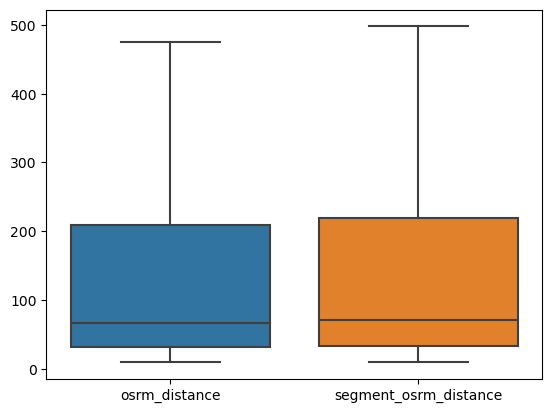

In [38]:
sns.boxplot(data=df_trip[['osrm_distance','segment_osrm_distance']])
plt.show()

> **Null Hypothesis:** There is no difference between OSRM Distance and OSRM Segment Distance

> **Alternative Hypothesis:** There is a difference between OSRM Distance and OSRM Segment Distance

   >>  - Alpha Value = 0.05
   >>  - Since it is a Independence test of two columns we can use ttest indpendent

In [39]:
alpha = 0.05

t_stat, p_value = ttest_ind(df_trip_scaled.osrm_distance, df_trip_scaled.segment_osrm_distance, alternative='two-sided')

print('Test Statistic:', t_stat)
print('P value:', p_value)

if p_value>alpha:
  print("Result: \nFail to reject null hypothesis. \nThere is no difference between OSRM Distance and OSRM Segment Distance")
else:
  print("Result: \nReject null hypothesis. \nThere is a difference between OSRM Distance and OSRM Segment Distance")

Test Statistic: -1.1170729902316234
P value: 0.26397217524361444
Result: 
Fail to reject null hypothesis. 
There is no difference between OSRM Distance and OSRM Segment Distance


#### OSRM time aggregated value vs segment OSRM time aggregated

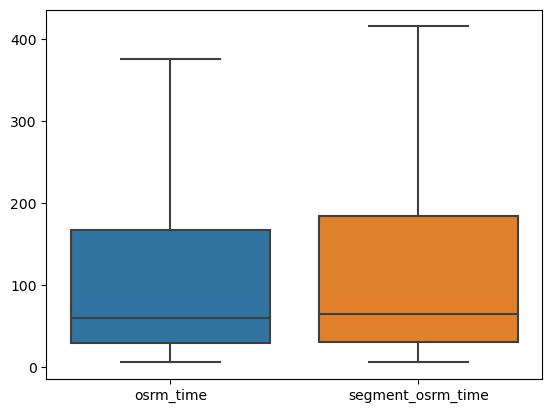

In [40]:
sns.boxplot(data=df_trip[['osrm_time','segment_osrm_time']])
plt.show()

> **Null Hypothesis:** There is no difference between OSRM time aggregated value and segment OSRM time aggregated
> **Alternative Hypothesis:** There is a difference between OSRM time aggregated value and segment OSRM time aggregated
   >>  - Alpha Value = 0.05
   >>  - Since it is a Independence test of two columns we can use ttest indpendent

In [41]:
alpha = 0.05

t_stat, p_value = ttest_ind(df_trip_scaled.osrm_time, df_trip_scaled.segment_osrm_time, alternative='two-sided')

print('Test Statistic:', t_stat)
print('P value:', p_value)

if p_value>alpha:
  print("Result: \nFail to reject null hypothesis. \nThere is no difference between OSRM Distance and OSRM Segment Distance")
else:
  print("Result: \nReject null hypothesis. \nThere is a difference between OSRM Distance and OSRM Segment Distance")

Test Statistic: 0.24033722334638818
P value: 0.8100705030270281
Result: 
Fail to reject null hypothesis. 
There is no difference between OSRM Distance and OSRM Segment Distance


In [42]:
sor = df_trip_scaled['Source_State'].value_counts()
des = df_trip_scaled['Destination_State'].value_counts()

source_data = {
    'State': sor.index,
    'Source_Count': sor.values  
}
destination_data = {
    'State': des.index,
    'Destination_Count': des.values
}

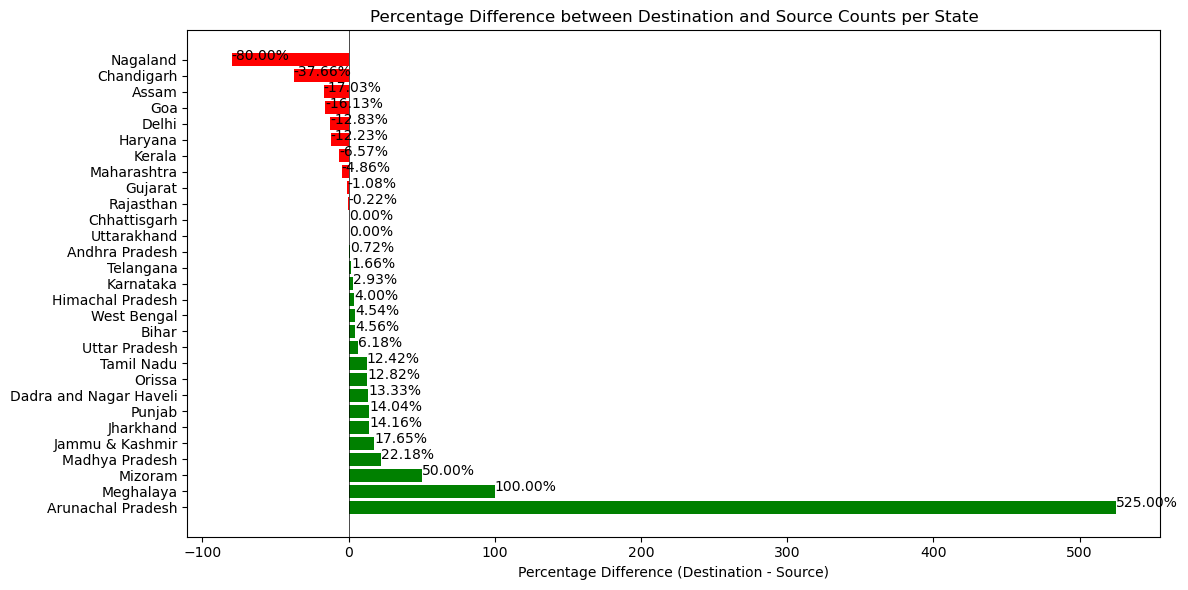

In [43]:
import pandas as pd
import matplotlib.pyplot as plt


df_source = pd.DataFrame(source_data)
df_destination = pd.DataFrame(destination_data)

# Merge based on State
df_combined = pd.merge(df_source, df_destination, on='State')

# Calculate percentage difference
df_combined['Percentage_Difference'] = (df_combined['Destination_Count'] - df_combined['Source_Count']) / df_combined['Source_Count'] * 100

# Sort by percentage difference for better visual insight
df_combined = df_combined.sort_values('Percentage_Difference', ascending=False)

# Plotting Diverging Bar Chart
plt.figure(figsize=(12, 6))
colors = ['green' if x > 0 else 'red' for x in df_combined['Percentage_Difference']]

plt.barh(df_combined['State'], df_combined['Percentage_Difference'], color=colors)
plt.xlabel('Percentage Difference (Destination - Source)')
plt.title('Percentage Difference between Destination and Source Counts per State')
plt.axvline(x=0, color='black', linewidth=0.5)

# Display percentage labels on the bars
for index, value in enumerate(df_combined['Percentage_Difference']):
    plt.text(value, index, f'{value:.2f}%')

plt.tight_layout()
plt.show()


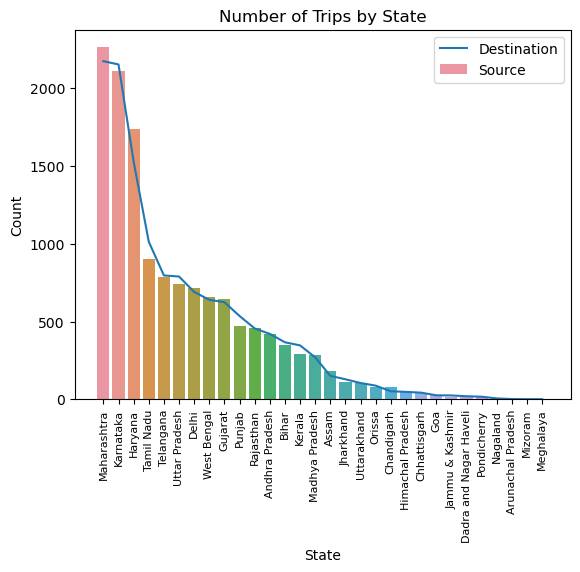

In [44]:
sns.barplot(data=df_source, x='State', y='Source_Count', label='Source')
sns.lineplot(data=df_destination, x='State', y='Destination_Count', label='Destination')
plt.title('Number of Trips by State')
plt.legend()
plt.xticks(rotation=90, fontsize=8)
plt.ylabel("Count")
plt.show()

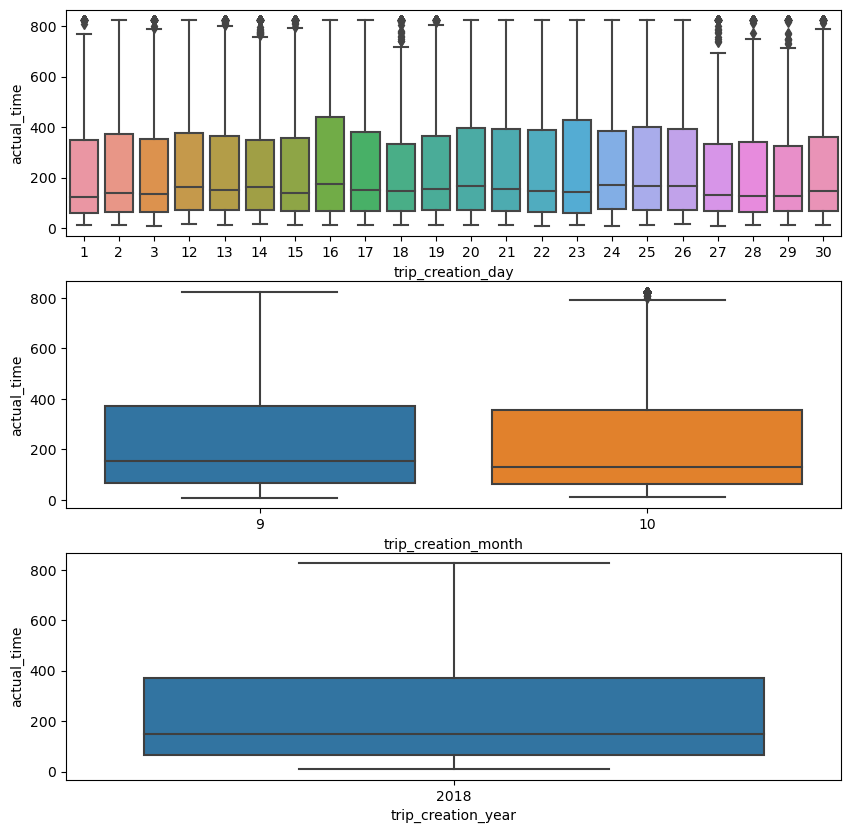

In [45]:
fig, ax = plt.subplots(3,1,figsize=(10,10))

sns.boxplot(data=df_encoded, x='trip_creation_day', y='actual_time', ax=ax[0])
sns.boxplot(data=df_encoded, x='trip_creation_month', y='actual_time', ax=ax[1])
sns.boxplot(data=df_encoded, x='trip_creation_year', y='actual_time', ax=ax[2])

plt.show();

In [46]:
busiest_corridor = df_encoded.groupby(['Source_State', 'Destination_State'])[['actual_distance_to_destination', 'actual_time','trip_uuid']].agg({
    'actual_distance_to_destination': 'mean',
    'actual_time': 'mean',
    'trip_uuid':'count'
}).reset_index()
busiest_corridor.rename(columns={'actual_distance_to_destination':'avg_distance','actual_time':'avg_time','trip_uuid':'Order Counts'},inplace=True)
busiest_corridor.sort_values('Order Counts',ascending=False)


,Source_State,Destination_State,avg_distance,avg_time,Order Counts
56,Karnataka,Karnataka,64.672262,156.281398,1903
76,Maharashtra,Maharashtra,109.566284,227.300372,1613
102,Tamil Nadu,Tamil Nadu,83.618702,180.212859,801
34,Haryana,Haryana,340.870775,319.808690,771
110,Telangana,Telangana,98.594198,214.093750,688
...,...,...,...,...,...
35,Haryana,Himachal Pradesh,97.972955,289.000000,1
101,Tamil Nadu,Kerala,99.858307,249.000000,1
29,Gujarat,Rajasthan,220.053994,431.000000,1
105,Telangana,Haryana,1237.221775,824.500000,1


In [47]:
busiest_corridor = df_encoded.groupby(['Source_City', 'Destination_City'])[['actual_distance_to_destination', 'actual_time','trip_uuid']].agg({
    'actual_distance_to_destination': 'mean',
    'actual_time': 'mean',
    'trip_uuid':'count'
}).reset_index()
busiest_corridor.rename(columns={'actual_distance_to_destination':'avg_distance','actual_time':'avg_time','trip_uuid':'Order Counts'},inplace=True)
busiest_corridor.sort_values('Order Counts',ascending=False)

,Source_City,Destination_City,avg_distance,avg_time,Order Counts
195,Bengaluru,Bengaluru,44.826968,111.048544,618
145,Bangalore,Bengaluru,27.056047,77.720879,455
652,Hyderabad,Hyderabad,56.092238,138.245070,355
249,Bhiwandi,Mumbai,23.004948,78.391566,332
194,Bengaluru,Bangalore,29.840055,95.844512,328
...,...,...,...,...,...
1069,Ongole,Markapur,84.867644,168.000000,1
94,Asifabad,Bellmpalli,186.049521,436.000000,1
1071,Ongole,Vinukonda,148.120419,259.000000,1
1,Achrol,Alwar,154.005832,283.000000,1


C:\Users\shriv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


[]

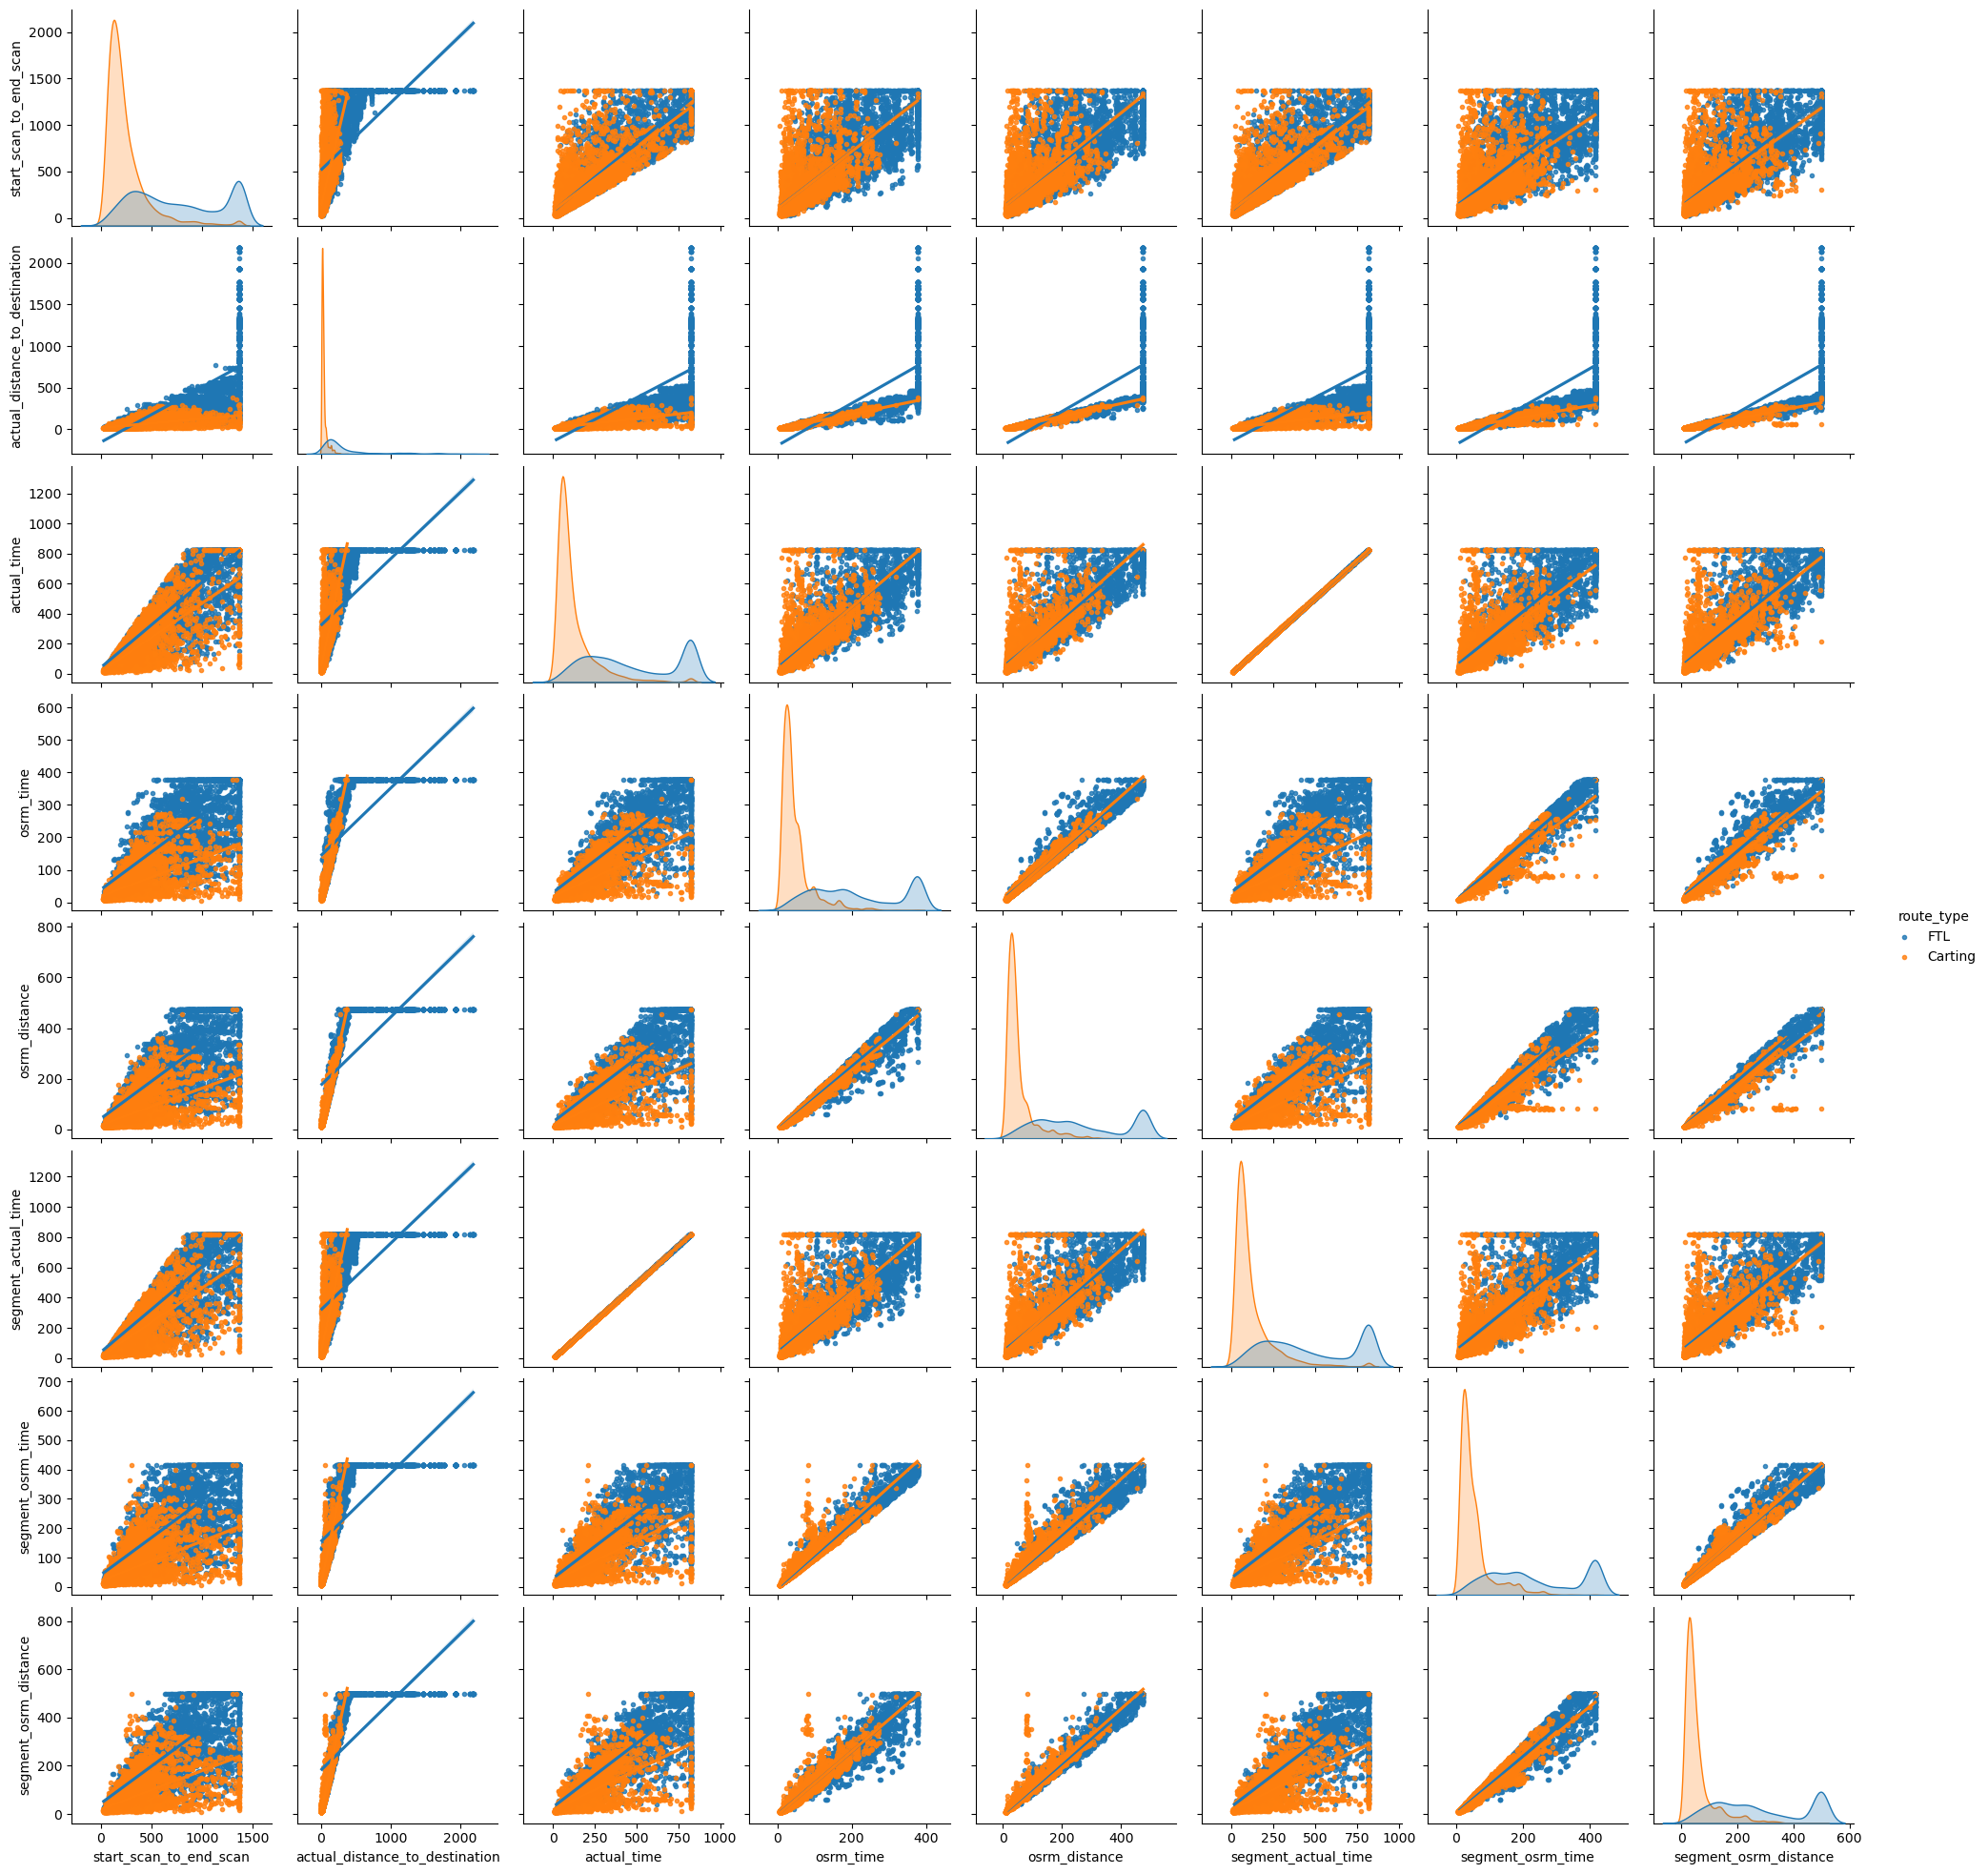

In [48]:
numerical_columns = ['start_scan_to_end_scan', 'actual_distance_to_destination',
                    'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
                    'segment_osrm_time', 'segment_osrm_distance']
sns.pairplot(data = df_trip,
             vars = numerical_columns,
             kind = 'reg',
             hue = 'route_type',
             markers = '.')
plt.plot()

[]

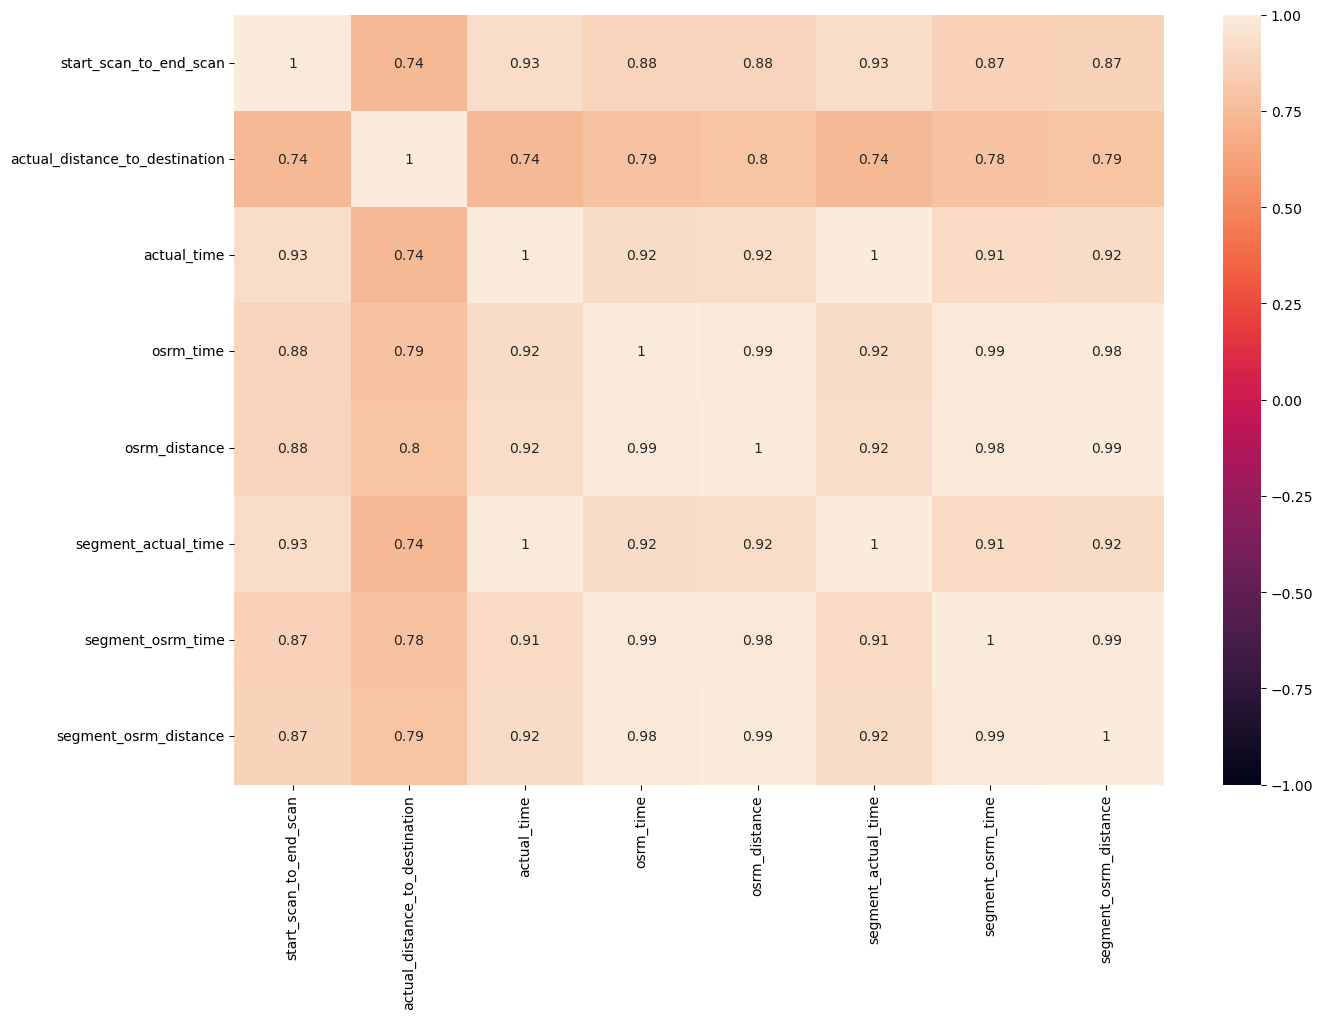

In [49]:
df_corr = df_trip[numerical_columns].corr()
plt.figure(figsize = (15, 10))
sns.heatmap(data = df_corr, vmin = -1, vmax = 1, annot = True)
plt.plot()

## Insights

- The data is given from the period '2018-09-12 00:00:16' to '2018-10-08 03:00:24'.

- Most of the data is for testing than for training.

- Most common route type is Carting.

- Most orders are sourced from the states like Maharashtra, Karnataka, Haryana, Tamil Nadu, Telangana

- Maximum number of trips originated from Mumbai city followed by Gurgaon Delhi, Bengaluru and Bhiwandi. That means that the seller base is strong in these cities.

- Maximum number of trips ended in Maharashtra state followed by Karnataka, Haryana, Tamil Nadu and Uttar Pradesh. That means that the number of orders placed in these states is significantly high.

- Maximum number of trips ended in Mumbai city followed by Bengaluru, Gurgaon, Delhi and Chennai. That means that the number of orders placed in these cities is significantly high.

- Most orders in terms of destination are coming from cities like bengaluru, mumbai, gurgaon, bangalore, Delhi.

- Features actual_time & osrm_time are statitically similar.

- Features start_scan_to_end_scan and segment_actual_time are statistically different from each other.

- Features osrm_distance and segment_osrm_distance are statistically different from each other.

- Both the osrm_time & segment_osrm_time are not statistically same.

## Recommendations

The current OSRM (Open Source Routing Machine) trip planning system at Delhivery requires significant improvements to ensure more accurate delivery predictions and better transporter efficiency. Several key discrepancies have been identified, and addressing these will enhance overall performance:

 - Improving OSRM's Accuracy: The OSRM trip planning system is facing discrepancies that need to be addressed for transporters. The routing engine should be reconfigured to deliver optimal results, factoring in real-world constraints and deviations.

 - Time Discrepancies: There is a notable difference between the osrm_time (model-predicted time) and the actual_time taken for deliveries. The team must focus on minimizing this gap to ensure more reliable delivery time predictions, enhancing the customer experience by providing accurate delivery expectations.

 - Distance Mismatches: Similarly, the osrm_distance (predicted distance) and actual_distance covered by delivery personnel are inconsistent. This could be due to several factors, such as drivers not following predefined routes, or OSRM failing to account for real-time conditions like traffic, road closures, or terrain issues. Resolving this will help avoid delays and improve route accuracy.

 - Focus on Key States: The majority of orders originate from or are delivered to key states like Maharashtra, Karnataka, Haryana, Tamil Nadu, and Uttar Pradesh. Enhancing the delivery corridors in these regions can further streamline operations, ensuring smoother logistics and better penetration in high-demand areas.

 - Traffic and Terrain Considerations: From a state perspective, some regions experience significant traffic congestion or challenging terrain conditions, which impact delivery times, especially during peak periods like festivals. Identifying these bottlenecks will allow Delhivery to adjust their routing strategies and better manage demand during high-traffic times, improving overall performance.